## Measuring Market Power in the Smartphone Industry

### Setting Working Directory and loading dataset

In [2]:
#
import os
#os.chdir('C:/Users/Lfran/OneDrive/Master thesis/Pricing power/Measurement')
#os.chdir('C:/Users/shpctac0ffef/Downloads/OneDrive_1_30.09.2025')

# Downloading dataset providing mobile manufacturer, characteristics launching p
#api.dataset_download_files('abdulmalik1518/mobiles-dataset-2025', path='0_Data', unzip=True)
%pip install pandas
import pandas as pd

phone_features = pd.read_csv('Mobiles Dataset (2025).csv', encoding= 'latin1')

# Collecting market share 2014-2023 for US, CN, India
share_us = pd.read_csv('vendor-US-monthly-201401-202312.csv', encoding='latin1')
share_cn = pd.read_csv('vendor-CN-monthly-201401-202312.csv', encoding='latin1')
share_in = pd.read_csv('vendor-IN-monthly-201401-202312.csv', encoding='latin1')
share_ww = pd.read_csv('vendor-ww-monthly-201401-202312.csv', encoding='latin1')




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'Mobiles Dataset (2025).csv'

In [ ]:
%pip install openpyxl 
import openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\shpctac0ffef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
share_ww.head(5)

,Date,Samsung,Apple,Unknown,Xiaomi,Huawei,Nokia,Oppo,LG,Motorola,...,Pantech,Avea,Karbonn,dtac,Yu,Sharp,Symphony,Lanix,T-Mobile,Other
0,2014-01,27.85,23.52,13.56,0.07,0.95,18.42,0.00,2.99,0.89,...,0.16,0.00,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.09
1,2014-02,30.40,22.94,11.43,0.08,0.98,17.27,0.02,3.07,1.10,...,0.14,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.08
2,2014-03,30.57,23.57,10.85,0.06,1.03,16.37,0.04,3.14,1.39,...,0.12,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.10
3,2014-04,31.59,23.21,10.51,0.08,1.10,15.61,0.05,3.16,1.44,...,0.10,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.12
4,2014-05,32.79,23.21,10.30,0.08,1.17,14.44,0.05,3.38,1.76,...,0.09,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.12


### Data Wrangling (mobile dataset + market share)

In [ ]:
#Droping price from other Pakistan in case we can't find data
#df.drop('Launched Price (Pakistan)', axis=1, inplace=True)

phone_features['Company Name'].unique()
# changing column name to Year
phone_features.rename(columns={'Launched Year': 'Year'}, inplace=True)


#converting format for data to year
#share_us['Date'] = pd.to_datetime(share_us['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year
#share_CN['Date'] = pd.to_datetime(share_CN['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year
#share_IN['Date'] = pd.to_datetime(share_IN['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year
share_ww['Date'] = pd.to_datetime(share_ww['Date'].astype(str), format='%Y-%m', errors='coerce').dt.year

# Pivoting marketshare of each firm for 

#share_us = share_us.melt(id_vars='Date', var_name='Company Name', value_name='Market Share US')
#share_CN = share_CN.melt(id_vars='Date', var_name='Company Name', value_name='Market Share CN')
#share_IN = share_IN.melt(id_vars='Date', var_name='Company Name', value_name='Market Share IN')
share_ww = share_ww.melt(id_vars='Date', var_name='Company Name', value_name='Market Share')



# grouping by year and firm
#share_us = share_us.groupby(['Date', 'Company Name'], as_index=False)['Market Share US'].mean()
#Share_cn = share_CN.groupby(['Date', 'Company Name'], as_index=False)['Market Share'].sum()
#share_in = share_IN.groupby(['Date', 'Company Name'], as_index=False)['Market Share'].sum()
share_ww = share_ww.groupby(['Date', 'Company Name'], as_index=False)['Market Share'].mean()

share_ww.rename(columns= {'Date' : 'Year'}, inplace=True)



share_ww.head(5)

,Year,Company Name,Market Share
0,2014,AIS,0.000000
1,2014,Acer,0.085000
2,2014,Alcatel,0.502500
3,2014,Apple,23.860833
4,2014,Archos,0.030000


### Collecting data bout top 10 selling phones and adding missing phones in the dataset

In [ ]:
import pandas as pd
import numpy as np
#Collecting data about each model and its market share per year
global_share_by_model = pd.read_csv('Cleaned_Top_Smartphone_Models__2021-2023_.csv', encoding='latin1')
global_share_by_model.rename(columns= {'Model' : 'Model Name'}, inplace=True)
global_share_by_model
# adding missng phones
# 1. Extract the two sets of names
share_models = set(global_share_by_model['Model Name'])
phone_models = set(phone_features['Model Name'])

# 2. Models in the share list but not in your phones
missing_in_phone = share_models - phone_models

# 3. Models in your phones but not in the share list
missing_in_global = phone_models - share_models


# 1) Define the missing models (including correct Launched Price)
missing_data = [
    {"Company Name": "Xiaomi",            "Model Name": "Redmi 9A",     "Mobile Weight": "194", "RAM": "2/3/4 GB", "Front Camera": "5 MP", "Back Camera": "13 MP",       "Processor": "MediaTek Helio G25",     "Battery Capacity": "5000 mAh", "Screen Size": "6.53 in", "Launched Price (USA)": "US$99.99",  "Year": 2020},
    {"Company Name": "Xiaomi",            "Model Name": "Redmi 9",      "Mobile Weight": "198 ", "RAM": "3/4 GB",   "Front Camera": "8 MP", "Back Camera": "13+8+5+2 MP","Processor": "MediaTek Helio G80",     "Battery Capacity": "5000 mAh", "Screen Size": "6.53 in", "Launched Price (USA)": "US$149",    "Year": 2020},
    {"Company Name": "Samsung","Model Name": "Galaxy A03",    "Mobile Weight": "196 g", "RAM": "3 GB",     "Front Camera": "5 MP", "Back Camera": "48+2 MP",   "Processor": "Unisoc T606",            "Battery Capacity": "5000 mAh", "Screen Size": "6.5 in",  "Launched Price (USA)": "US$109.99","Year": 2021},
    {"Company Name": "Samsung","Model Name": "Galaxy A04e",   "Mobile Weight": "188 g", "RAM": "3 GB",   "Front Camera": "5 MP", "Back Camera": "13+2 MP",   "Processor": "MediaTek Helio P35",     "Battery Capacity": "5000 mAh", "Screen Size": "6.5 in",  "Launched Price (USA)": "US$119.99","Year": 2022},
    {"Company Name": "Samsung","Model Name": "Galaxy A12",    "Mobile Weight": "205 g", "RAM": "4 GB", "Front Camera": "8 MP", "Back Camera": "48+5+2+2 MP","Processor": "MediaTek Helio P35",     "Battery Capacity": "5000 mAh", "Screen Size": "6.5 in",  "Launched Price (USA)": "US$179.99","Year": 2020},
    {"Company Name": "Samsung","Model Name": "Galaxy A13",    "Mobile Weight": "195 g", "RAM": "6 GB", "Front Camera": "8 MP", "Back Camera": "50+5+2+2 MP","Processor": "Dimensity 700 5G",      "Battery Capacity": "5000 mAh", "Screen Size": "6.6 in",  "Launched Price (USA)": "US$189.99","Year": 2022},
    {"Company Name": "Samsung","Model Name": "Galaxy A14 4G", "Mobile Weight": "201 g", "RAM": "6 GB",   "Front Camera": "13 MP","Back Camera": "50+5+2 MP",   "Processor": "Helio G80 / Exynos 850", "Battery Capacity": "5000 mAh", "Screen Size": "6.6 in",  "Launched Price (USA)": "US$199.99","Year": 2023},
    {"Company Name": "Samsung","Model Name": "Galaxy A14 5G","Mobile Weight": "202 g", "RAM": "6 GB", "Front Camera": "13 MP","Back Camera": "50+2+2 MP",   "Processor": "Dimensity 700 / Exynos 1330","Battery Capacity": "5000 mAh", "Screen Size": "6.6 in","Launched Price (USA)": "US$249.99","Year": 2023},
    {"Company Name": "Apple",         "Model Name": "iPhone SE 2020", "Mobile Weight": "148 g", "RAM": "3 GB",     "Front Camera": "7 MP", "Back Camera": "12 MP",      "Processor": "Apple A13 Bionic",       "Battery Capacity": "1821 mAh",  "Screen Size": "4.7 in",  "Launched Price (USA)": "US$399",   "Year": 2020},
    {"Company Name": "Apple",         "Model Name": "iPhone SE 2022", "Mobile Weight": "144 g", "RAM": "4 GB",     "Front Camera": "7 MP", "Back Camera": "12 MP",      "Processor": "Apple A15 Bionic",       "Battery Capacity": "2018 mAh",  "Screen Size": "4.7 in",  "Launched Price (USA)": "US$429",   "Year": 2022}
]


# 2) Build a DataFrame from that list
missing_df = pd.DataFrame(missing_data)

# 3) Append to your existing phone_features DataFrame
phone_features = pd.concat([phone_features, missing_df], ignore_index=True, sort=False)

phone_features.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Year'],
      dtype='object')

In [ ]:
#updating columns containing numeric values seperated with int
import pandas as pd
import re


import pandas as pd
import numpy as np
import re
def extract_screen_inches(size_str):
    """
    From strings like "6.7 inch", "6.72.7", "7\"", etc.,
    return the first valid float found, else NaN.
    """
    if pd.isna(size_str):
        return np.nan
    # find all runs of digits with optional decimal
    nums = re.findall(r'(\d+(?:\.\d+)?)', str(size_str))
    return float(nums[0]) if nums else np.nan

# 2. Apply it
phone_features['Screen Size (inches)'] = phone_features['Screen Size'].apply(extract_screen_inches)


# 1. Helper to extract MP values from a string
def extract_mp_values(camera_str):
    cleaned = re.sub(r"4K|1080p|720p|\(.*?\)", "", str(camera_str), flags=re.IGNORECASE)
    matches = re.findall(r"(\d+)\s*MP", cleaned.upper())
    return [int(m) for m in matches] if matches else []

# 2. Helper to extract video resolution after a slash
def extract_video_resolution(camera_str):
    if pd.isna(camera_str):
        return np.nan
    parts = str(camera_str).split('/')
    if len(parts) > 1:
        res = parts[1].strip().upper()
        return res if re.match(r'^(4K|1080P|720P)$', res) else np.nan
    return np.nan

# 3. Photo-MP extraction
phone_features['Front Camera (MP)'] = (
    phone_features['Front Camera']
      .apply(lambda x: extract_mp_values(x)[0] if extract_mp_values(x) else 0)
)
phone_features['Back Camera (Main MP)'] = (
    phone_features['Back Camera']
      .apply(lambda x: extract_mp_values(x)[0] if extract_mp_values(x) else 0)
)
phone_features['Back Camera (Secondary MP)'] = (
    phone_features['Back Camera']
      .apply(lambda x: extract_mp_values(x)[1] if len(extract_mp_values(x)) > 1 else 0)
)

# 4. Video-res extraction
phone_features['Front Camera Video'] = phone_features['Front Camera'].apply(extract_video_resolution)
phone_features['Back Camera Video']  = phone_features['Back Camera'].apply(extract_video_resolution)

# 5. 4K dummy variables
phone_features['Front Camera 4K'] = (phone_features['Front Camera Video'] == '4K').astype(int)
phone_features['Back Camera 4K']  = (phone_features['Back Camera Video']  == '4K').astype(int)

# 6. Drop front-camera 4K if it’s always zero
if phone_features['Front Camera 4K'].sum() == 0:
    phone_features.drop(columns=['Front Camera Video','Front Camera 4K'], inplace=True)

#show data for Apple
apple = phone_features[phone_features['Company Name'] == "Apple"]
apple.columns


Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Year', 'Screen Size (inches)',
       'Front Camera (MP)', 'Back Camera (Main MP)',
       'Back Camera (Secondary MP)', 'Front Camera Video', 'Back Camera Video',
       'Front Camera 4K', 'Back Camera 4K'],
      dtype='object')

In [ ]:
# merging marketshare with phone_featueres as df
df = phone_features.merge(share_ww, on= ['Company Name', 'Year'], how='inner')


In [ ]:
#removing comapnies with less thna 1 % market share
df = df[df['Market Share'] > 1]
df.head(5)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),...,Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),Front Camera Video,Back Camera Video,Front Camera 4K,Back Camera 4K,Market Share
0,Apple,iPhone 15 128GB,171g,6GB,12MP,48MP,A16 Bionic,"3,200mAh",6.1 inches,"PKR 204,999",...,2023,6.1,12,48,0,NaN,NaN,0,0,28.973333
1,Apple,iPhone 15 256GB,171g,6GB,12MP,48MP,A16 Bionic,"3,200mAh",6.1 inches,"PKR 214,999",...,2023,6.1,12,48,0,NaN,NaN,0,0,28.973333
2,Apple,iPhone 15 512GB,171g,6GB,12MP,48MP,A16 Bionic,"3,200mAh",6.1 inches,"PKR 224,999",...,2023,6.1,12,48,0,NaN,NaN,0,0,28.973333
3,Apple,iPhone 15 Plus 128GB,203g,6GB,12MP,48MP,A16 Bionic,"4,300mAh",6.7 inches,"PKR 234,999",...,2023,6.7,12,48,0,NaN,NaN,0,0,28.973333
4,Apple,iPhone 15 Plus 256GB,203g,6GB,12MP,48MP,A16 Bionic,"4,300mAh",6.7 inches,"PKR 244,999",...,2023,6.7,12,48,0,NaN,NaN,0,0,28.973333


### Adjusting the dataset of phone features so it is aggreated as each year's model per brand

In [ ]:



# 1. Mobile Weight → Mobile Weight (grams)
phone_features['Mobile Weight (grams)'] = pd.to_numeric(
    phone_features['Mobile Weight']
      .str.replace(r'\D', '', regex=True),
    errors='coerce'
)

# 2. Battery Capacity → Battery Capacity (mAh)
phone_features['Battery Capacity (mAh)'] = pd.to_numeric(
    phone_features['Battery Capacity']
      .str.replace(r'\D', '', regex=True),
    errors='coerce'
).astype('Int64')

# 3. RAM → RAM (GB)
ram_digits = (
    phone_features['RAM']
      .str.replace('TB', '000', regex=False)
      .str.extract(r'(\d+)', expand=False)
)
phone_features['RAM (GB)'] = pd.to_numeric(ram_digits, errors='coerce')

# 4. Screen Size → Screen Size (inches)
phone_features['Screen Size (inches)'] = (
    phone_features['Screen Size']
      .astype(str)
      .str.findall(r'\d+(?:\.\d+)?')
      .apply(lambda nums: nums[-1] if nums else np.nan)
      .astype(float)
)

# (Optional) Drop the raw columns
# phone_features.drop(
#     columns=['Mobile Weight','Battery Capacity','RAM','Screen Size'],
#     inplace=True
# )


In [ ]:

phone_features.drop(columns= {'Front Camera Video', 'Back Camera Video', "Mobile Weight",	"RAM",	"Front Camera",	"Back Camera", "Battery Capacity",	"Screen Size" }, inplace=True)


In [ ]:

# Ensure your Model Name column is string type, then remove digits+GB and trim whitespace
df['Model Name'] = (
    df['Model Name']
      .astype(str)
      .str.replace(r'\s*\d+GB', '', regex=True)
      .str.strip()
)
df.columns


Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Year', 'Screen Size (inches)',
       'Front Camera (MP)', 'Back Camera (Main MP)',
       'Back Camera (Secondary MP)', 'Front Camera Video', 'Back Camera Video',
       'Front Camera 4K', 'Back Camera 4K', 'Market Share'],
      dtype='object')

In [ ]:
# Dropping unecessary columns to avoid NAs in the data
df.drop(columns= {'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Screen Size', 'Launched Price (Pakistan)',
       'Launched Price (India)', 'Launched Price (China)','Launched Price (Dubai)'}, inplace=True)

In [ ]:
df['Front Camera Video'].fillna(0, inplace=True)
df['Back Camera Video'].fillna(0, inplace=True)
df.shape

C:\Users\shpctac0ffef\AppData\Local\Temp\ipykernel_21120\2637826147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Front Camera Video'].fillna(0, inplace=True)
C:\Users\shpctac0ffef\AppData\Local\Temp\ipykernel_21120\2637826147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

(411, 15)

### Adding data about top 10 selling phones to the df

In [ ]:
import pandas as pd


# 2. Load top-10 share data
global_market_share_by_model = pd.read_csv(
    'Cleaned_Top_Smartphone_Models__2021-2023_.csv',
    encoding='ISO-8859-1'
)[['Model','Year','Share (%)','Rank']]

global_market_share_by_model.rename(columns={'Model':'Model Name'}, inplace=True)
# 3. Merge on Model Name & Year
df_merged = df.merge(
    global_market_share_by_model,
    on=['Model Name','Year'],
    how='left'
)

# 4. Rename share/rank
df_merged.rename(columns={
    'Share (%)':'Sales (%) as Top 10',
    'Rank':'Rank in Top 10'
}, inplace=True)

# 5. Remove accidental duplicate columns
df_merged = df_merged.loc[:, ~df_merged.columns.duplicated()]




df = df_merged

import pandas as pd

# 1. Remove anything that isn’t a digit or a decimal point
df['Launched Price (USA)'] = (
    df['Launched Price (USA)']
      .astype(str)
      .str.replace(r'[^0-9\.]', '', regex=True)
      .replace('', '0')            # turn blank strings into “0”
)

# 2. Convert to float and overwrite the column
df['Launched Price (USA)'] = df['Launched Price (USA)'].astype(float)

# 3. Verify
df_merged.head(400)
# should now print: float64


,Company Name,Model Name,Processor,Battery Capacity,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),Front Camera Video,Back Camera Video,Front Camera 4K,Back Camera 4K,Market Share,Sales (%) as Top 10,Rank in Top 10
0,Apple,iPhone 15,A16 Bionic,"3,200mAh",799.0,2023,6.10,12,48,0,0,0.0,0,0,28.973333,1.6,7.0
1,Apple,iPhone 15,A16 Bionic,"3,200mAh",849.0,2023,6.10,12,48,0,0,0.0,0,0,28.973333,1.6,7.0
2,Apple,iPhone 15,A16 Bionic,"3,200mAh",949.0,2023,6.10,12,48,0,0,0.0,0,0,28.973333,1.6,7.0
3,Apple,iPhone 15 Plus,A16 Bionic,"4,300mAh",899.0,2023,6.70,12,48,0,0,0.0,0,0,28.973333,NaN,NaN
4,Apple,iPhone 15 Plus,A16 Bionic,"4,300mAh",999.0,2023,6.70,12,48,0,0,0.0,0,0,28.973333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Infinix,Hot 30i NFC,Unisoc T606,"5,000mAh",159.0,2023,6.60,8,13,0,0,0.0,0,0,1.109167,NaN,NaN
396,Infinix,Hot 30 Play,MediaTek Helio G37,"6,000mAh",179.0,2023,6.82,8,16,0,0,0.0,0,0,1.109167,NaN,NaN
397,Infinix,Hot 30 5G,MediaTek Dimensity 810,"5,000mAh",239.0,2023,6.78,8,50,0,0,0.0,0,0,1.109167,NaN,NaN
398,Infinix,Zero 30,MediaTek Dimensity 8020,"5,000mAh",349.0,2023,6.78,50,108,0,0,0.0,0,0,1.109167,NaN,NaN


In [ ]:
df1 =  df
df1.drop(columns={'Market Share'}, inplace=True)


### Loading Global Smartphone Shipment and Smartphone User dataset

In [ ]:
smartphone_users_ww = pd.read_excel('statistic_id1143723_number-of-smartphone-users-worldwide-2014-2029.xlsx')
smartphone_shipments_ww = pd.read_excel('statistic_id271490_global-smartphone-shipments-by-vendor-2009-2024.xlsx')

In [ ]:
smartphone_users_ww.head(5)

,Year,Shipment in millions
0,2014,1032.55
1,2015,1217.51
2,2016,1401.52
3,2017,1583.40
4,2018,1838.17


### Loading Brand Equity for the Brands for each year

In [ ]:
import pandas as pd

brand_equity_2024 = pd.read_csv(
    'brandirectory-ranking-data-electronics-and-appliances-2024.csv',
    encoding='ISO-8859-1'
)

brand_equity_2023 = pd.read_csv(
    'brandirectory-ranking-data-electronics-and-appliances-2023.csv',
    encoding='ISO-8859-1'
)

brand_equity_2022 = pd.read_csv(
    'brandirectory-ranking-data-electronics-and-appliances-50-2022.csv',
    encoding='ISO-8859-1'
)

brand_equity_2021 = pd.read_csv(
    'brandirectory-ranking-data-technology-100-2021.csv',
    encoding='ISO-8859-1'
)

brand_equity_2020 = pd.read_csv(
    'brandirectory-ranking-data-technology-100-2020.csv',
    encoding='ISO-8859-1'
)

brand_equity_2019 = pd.read_csv(
    'brandirectory-ranking-data-technology-100-2019.csv',
    encoding='ISO-8859-1'
)

print(brand_equity_2023.head(5), brand_equity_2020.head(5)
,brand_equity_2021.head(5)
,brand_equity_2022.head(5)
,brand_equity_2024.head(5)
,brand_equity_2019.head(5))





   ï»¿2023  2022               Name        Country  2023 - USD  2022 - USD  \
0        1   1.0              Apple  United States   297511.81   355079.97   
1        2   2.0            Samsung    South Korea    82722.44    89229.04   
2        3   3.0             Huawei          China    44291.65    71232.74   
3        4   4.0  Dell Technologies  United States    22612.12    22220.00   
4        5   5.0           LG Group    South Korea    21260.97    20792.00   

   2023 2022.1  
0  AAA-    AAA  
1  AAA-    AAA  
2  AAA-   AAA-  
3    AA     AA  
4   AA+    AA+      ï»¿2020  2019       Name        Country  2020 - USD  2019 - USD 2020 2019.1
0        1   1.0     Amazon  United States   220790.75   187905.15  AAA   AAA-
1        2   3.0     Google  United States   188511.64   142754.85  AAA    AAA
2        3   2.0      Apple  United States   140524.32   153634.28  AAA    AAA
3        4   4.0  Microsoft  United States   117072.01   119594.99  AAA    AAA
4        5   5.0   Facebook  Unite

In [ ]:
import pandas as pd
import glob
import re
import os

def process_file(path):
    # Read CSV and clean any BOM
    data = pd.read_csv(path)
    data.columns = [col.lstrip('\ufeff') for col in data.columns]
    
    # Parse current year from filename (assumes '-YYYY.csv' suffix)
    filename = os.path.basename(path)
    match = re.search(r'-(\d{4})\.csv$', filename)
    curr_year = int(match.group(1))
    prev_year = curr_year - 1
    
    # Rename columns: use 'rank', 'be' for brand equity, and 'credit' prefixes
    rename_map = {
        str(curr_year):      f"rank_{curr_year}",
        f"{curr_year}.1":    f"credit_{curr_year}",
        str(prev_year):      f"rank_{prev_year}",
        f"{prev_year}.1":    f"credit_{prev_year}",
        f"{curr_year} - USD": f"be_{curr_year}",
        f"{prev_year} - USD": f"be_{prev_year}",
    }
    # Only rename existing columns
    rename_map = {k: v for k, v in rename_map.items() if k in data.columns}
    data = data.rename(columns=rename_map)
    
    # Identify stub columns
    rank_cols = [c for c in data.columns if c.startswith("rank_")]
    be_cols   = [c for c in data.columns if c.startswith("be_")]
    cred_cols = [c for c in data.columns if c.startswith("credit_")]
    
    # Melt each metric into long form
    rank_long = data.melt(id_vars=['Name','Country'], value_vars=rank_cols, var_name='metric', value_name='Rank')
    be_long   = data.melt(id_vars=['Name','Country'], value_vars=be_cols,   var_name='metric', value_name='Brand Equity')
    cred_long = data.melt(id_vars=['Name','Country'], value_vars=cred_cols, var_name='metric', value_name='Credit Score')
    
    # Extract Year from the 'metric' stub
    for temp in (rank_long, be_long, cred_long):
        temp['Year'] = temp['metric'].str.extract(r'(\d{4})').astype(int)
    
    # Merge the three long tables
    data_long = (
        rank_long[['Name','Country','Year','Rank']]
        .merge(be_long[['Name','Country','Year','Brand Equity']], on=['Name','Country','Year'])
        .merge(cred_long[['Name','Country','Year','Credit Score']], on=['Name','Country','Year'])
    )
    
    return data_long

# Process all brand equity files
file_paths = glob.glob('brandirectory-ranking-data-*.csv')
processed_list = [process_file(p) for p in file_paths]
brand_equity = pd.concat(processed_list, ignore_index=True)

brand_equity = brand_equity[brand_equity['Rank'].notna()]
brand_equity = brand_equity.astype({'Rank': 'Int64'})
brand_equity.rename(columns={'Name': 'Company Name'}, inplace=True)
brand_equity.head(5)
brand_equity.rename(columns={'Rank': 'Brand Equity Rank'}, inplace=True)
df1 = df1.merge(brand_equity, on=['Company Name', 'Year'], how='left')

brand_equity.to_csv('generated_csv/brand_equity.csv', index=False)


### Adding worldwide smartphone shipment

In [ ]:
import pandas as pd

# 1. Read with the 5th row as header
df_ship = pd.read_excel(
    'statistic_id271490_global-smartphone-shipments-by-vendor-2009-2024.xlsx',
    header=4,           # zero-based, so header=4 picks the 5th row
    engine='openpyxl'
)

# 2. Clean up: drop any initial “Unnamed” index column
if df_ship.columns[0].lower().startswith('unnamed'):
    df_ship = df_ship.iloc[:, 1:]

# 3. Rename the first column to “Quarter”
df_ship = df_ship.rename(columns={df_ship.columns[0]: 'Quarter'})

# 4. Melt all remaining vendor columns into long form
df_long = df_ship.melt(
    id_vars='Quarter',
    var_name='Company',
    value_name='shipments in millions'
)

# 5. Clean shipments to numeric
df_long['shipments in millions'] = (
    df_long['shipments in millions']
      .astype(str)
      .str.replace(r"[^\d\.]+", "", regex=True)
      .pipe(pd.to_numeric, errors='coerce')
)

# 6. Extract two-digit year (with or without apostrophe), override any label containing “10”
yr2 = df_long['Quarter'].str.extract(r"'?(\d{2})")[0].astype(float)
mask_10 = df_long['Quarter'].str.contains(r"\b10\b")
yr2[mask_10] = 10

# 7. Build full year and drop bad rows
df_long['Year'] = (yr2 + 2000).astype('Int64')
df_long = df_long.dropna(subset=['Year', 'shipments in millions'])

# 8. Sum over quarters to get annual shipments by company
df_ship_year = (
    df_long
    .groupby(['Company', 'Year'], as_index=False)['shipments in millions']
    .sum()
)

# Result: df_ship_year has columns [Company, Year, shipments]
print(df_ship_year.head())

df_ship_year.rename(columns={'Company': 'Company Name'}, inplace=True)
df1 = df1.merge(df_ship_year, on=['Company Name', 'Year'], how='left')

  Company  Year  shipments in millions
0   Apple  2009                    8.7
1   Apple  2010                   47.4
2   Apple  2011                   93.1
3   Apple  2012                  135.8
4   Apple  2013                  153.4


In [ ]:
df1 = df1[df1['Sales (%) as Top 10'].notna()]
df1.groupby(['Company Name', 'Model Name'])['Launched Price (USA)'].mean()

Company Name  Model Name       
Apple         iPhone 13             899.000000
              iPhone 13 Pro Max    1232.333333
              iPhone 14             865.666667
              iPhone 14 Pro        1199.000000
              iPhone 14 Pro Max    1299.000000
              iPhone 15             865.666667
              iPhone 15 Pro        1199.000000
              iPhone 15 Pro Max    1299.000000
              iPhone SE 2022        429.000000
Samsung       Galaxy A13            189.990000
              Galaxy A14 4G         199.990000
              Galaxy A14 5G         249.990000
Name: Launched Price (USA), dtype: float64

In [ ]:
df1.head(50)


,Company Name,Model Name,Processor,Battery Capacity,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),...,Back Camera Video,Front Camera 4K,Back Camera 4K,Sales (%) as Top 10,Rank in Top 10,Country,Brand Equity Rank,Brand Equity,Credit Score,shipments in millions
0,Apple,iPhone 15,A16 Bionic,"3,200mAh",799.00,2023,6.1,12,48,0,...,0.0,0,0,1.6,7.0,United States,1,297511.81,AAA-,231.5
1,Apple,iPhone 15,A16 Bionic,"3,200mAh",799.00,2023,6.1,12,48,0,...,0.0,0,0,1.6,7.0,United States,1,297511.81,AAA-,231.5
2,Apple,iPhone 15,A16 Bionic,"3,200mAh",849.00,2023,6.1,12,48,0,...,0.0,0,0,1.6,7.0,United States,1,297511.81,AAA-,231.5
3,Apple,iPhone 15,A16 Bionic,"3,200mAh",849.00,2023,6.1,12,48,0,...,0.0,0,0,1.6,7.0,United States,1,297511.81,AAA-,231.5
4,Apple,iPhone 15,A16 Bionic,"3,200mAh",949.00,2023,6.1,12,48,0,...,0.0,0,0,1.6,7.0,United States,1,297511.81,AAA-,231.5
5,Apple,iPhone 15,A16 Bionic,"3,200mAh",949.00,2023,6.1,12,48,0,...,0.0,0,0,1.6,7.0,United States,1,297511.81,AAA-,231.5
12,Apple,iPhone 15 Pro,A16 Bionic,"4,400mAh",1099.00,2023,6.1,12,48,12,...,0.0,1,0,1.6,6.0,United States,1,297511.81,AAA-,231.5
13,Apple,iPhone 15 Pro,A16 Bionic,"4,400mAh",1099.00,2023,6.1,12,48,12,...,0.0,1,0,1.6,6.0,United States,1,297511.81,AAA-,231.5
14,Apple,iPhone 15 Pro,A16 Bionic,"4,400mAh",1199.00,2023,6.1,12,48,12,...,0.0,1,0,1.6,6.0,United States,1,297511.81,AAA-,231.5
15,Apple,iPhone 15 Pro,A16 Bionic,"4,400mAh",1199.00,2023,6.1,12,48,12,...,0.0,1,0,1.6,6.0,United States,1,297511.81,AAA-,231.5


In [ ]:
# Step 1: Convert to string, remove 'mAh', strip spaces
df1["Battery Capacity"] = (
    df1["Battery Capacity"]
    .astype(str)  # Convert to string first
    .str.replace("mAh", "", regex=False)
    .str.replace(",", "")
    .str.strip()
)

# Step 2: Convert cleaned string to integer
df1["Battery Capacity"] = df1["Battery Capacity"].astype(int)


In [ ]:
df1

,Company Name,Model Name,Processor,Battery Capacity,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),...,Sales (%) as Top 10,Rank in Top 10,Country,Brand Equity Rank,Brand Equity,Credit Score,shipments in millions,Average World GDP per Capita (USD),Inflation,GDP growth in %
0,Apple,iPhone 15,A16 Bionic,3200,799.00,2023,6.1,12,48,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
1,Apple,iPhone 15,A16 Bionic,3200,799.00,2023,6.1,12,48,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
2,Apple,iPhone 15,A16 Bionic,3200,849.00,2023,6.1,12,48,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
3,Apple,iPhone 15,A16 Bionic,3200,849.00,2023,6.1,12,48,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
4,Apple,iPhone 15,A16 Bionic,3200,949.00,2023,6.1,12,48,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
5,Apple,iPhone 15,A16 Bionic,3200,949.00,2023,6.1,12,48,0,...,1.6,7.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
6,Apple,iPhone 15 Pro,A16 Bionic,4400,1099.00,2023,6.1,12,48,12,...,1.6,6.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
7,Apple,iPhone 15 Pro,A16 Bionic,4400,1099.00,2023,6.1,12,48,12,...,1.6,6.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
8,Apple,iPhone 15 Pro,A16 Bionic,4400,1199.00,2023,6.1,12,48,12,...,1.6,6.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509
9,Apple,iPhone 15 Pro,A16 Bionic,4400,1199.00,2023,6.1,12,48,12,...,1.6,6.0,United States,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509


### Loading Global GDP per Capita

In [ ]:
import pandas as pd
import re
# Load and preprocess GDP per capita for World
file_path = "GDP_capita_ww.csv"
gdp_capita = pd.read_csv(
    file_path,
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)
ww_gdp_capita = gdp_capita[gdp_capita['Country Name'] == 'World']

# Identify year columns and reshape
year_cols = [col for col in ww_gdp_capita.columns if re.fullmatch(r'\d{4}', col)]
ww_gdp_capita = ww_gdp_capita.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Average World GDP per Capita (USD)'
)
ww_gdp_capita.drop(columns=['Country Name'], inplace=True)

# Convert Year to int
ww_gdp_capita['Year'] = ww_gdp_capita['Year'].astype(int)

# Filter to years 2014–2023 directly
ww_gdp_capita = ww_gdp_capita[
    (ww_gdp_capita['Year'] >= 2014) &
    (ww_gdp_capita['Year'] <= 2023)
].reset_index(drop=True)

ww_gdp_capita


,Year,Average World GDP per Capita (USD)
0,2014,14979.431731
1,2015,15141.663375
2,2016,15592.552431
3,2017,16281.331659
4,2018,17141.145818
5,2019,17962.542394
6,2020,17725.788979
7,2021,19633.888356
8,2022,21637.491441
9,2023,22850.358227


### Loading Global GDP Growth

In [ ]:
import pandas as pd
import re

# 1. Load the CSV, skipping the 4 metadata rows so the true header is used
gdp_growth = pd.read_csv(
    'GDP_growth_ww.csv',
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)

# 2. Filter to only the "World" row
ww_gdp_growth = gdp_growth[gdp_growth['Country Name'] == 'World']

# 3. Identify which columns are actual years (four-digit strings)
year_cols = [col for col in ww_gdp_growth.columns if re.match(r'^\d{4}$', col)]

# 4. Melt just those year columns into long form
ww_gdp_growth = ww_gdp_growth.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='GDP growth in %'
)

# 5. Drop the now-unneeded Country Name
ww_gdp_growth.drop(columns='Country Name', inplace=True)

# 6. Safely convert Year from string to integer
ww_gdp_growth['Year'] = ww_gdp_growth['Year'].astype(int)

# 7. Filter to years from 2014 onward
ww_gdp_growth = ww_gdp_growth[ww_gdp_growth['Year'] >= 2014].reset_index(drop=True)

# 8. (Optional) Keep only the first ten rows (i.e. 2014–2023)
ww_gdp_growth = ww_gdp_growth.iloc[:10, :]

# 9. Inspect the final result
print(ww_gdp_growth)


   Year  GDP growth in %
0  2014         3.131476
1  2015         3.128787
2  2016         2.813736
3  2017         3.451446
4  2018         3.282197
5  2019         2.675966
6  2020        -2.878323
7  2021         6.350090
8  2022         3.238021
9  2023         2.833509


### Loading Global Inflation (Consumer Price)

In [ ]:


# 1. Load the CSV, skipping the 4 metadata rows so the true header is used
inflation = pd.read_csv(
    'Inflation_ww.csv',
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)

# 2. Filter to only the “World” row
ww_inflation = inflation[inflation['Country Name'] == 'World']

# 3. Identify which columns are actual years (four-digit strings)
year_cols = [col for col in ww_inflation.columns if re.match(r'^\d{4}$', col)]

# 4. Melt just those year columns into long form
ww_inflation = ww_inflation.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Inflation'
)

# 5. Drop the now-redundant Country Name column
ww_inflation.drop(columns=['Country Name'], inplace=True)

# 6. Convert Year to integer cleanly
ww_inflation['Year'] = pd.to_numeric(ww_inflation['Year'], errors='coerce').astype(int)

# 7. Filter to years ≥ 2014
ww_inflation = ww_inflation[ww_inflation['Year'] >= 2014].reset_index(drop=True)

# 8. (Optional) Keep only the first ten entries (i.e. 2014–2023)
ww_inflation = ww_inflation.iloc[:10, :]

# 9. Inspect the result
print(ww_inflation)


   Year  Inflation
0  2014   2.354491
1  2015   1.443857
2  2016   1.605539
3  2017   2.254277
4  2018   2.442583
5  2019   2.206073
6  2020   1.905664
7  2021   3.475403
8  2022   7.930929
9  2023   5.733163


### Loading Global Unemployment rate (% of total labor force)

In [ ]:
import pandas as pd
import re

# 1. Load the CSV, skipping the 4 metadata rows so the true header is used
unemployment = pd.read_csv(
    'Unemployement_ww.csv',
    skiprows=4,
    engine='python',
    encoding='ISO-8859-1'
)

# 2. Filter to only the “World” row
ww_unemployment = unemployment[unemployment['Country Name'] == 'World']

# 3. Find all the year‐columns (i.e. those that look like “YYYY”)
year_cols = [col for col in ww_unemployment.columns if re.match(r'^\d{4}$', col)]

# 4. Melt just those year columns into long form
ww_unemployment = ww_unemployment.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Unemployment (% of total labor force)'
)

# 5. Drop the now‐redundant Country Name column
ww_unemployment.drop(columns=['Country Name'], inplace=True)

# 6. Convert Year to integer cleanly
ww_unemployment['Year'] = pd.to_numeric(ww_unemployment['Year'], errors='coerce').astype(int)

# 7. Filter to years ≥ 2014
ww_unemployment = ww_unemployment[ww_unemployment['Year'] >= 2014].reset_index(drop=True)

# 8. (Optional) Keep only the first ten entries (2014–2023)
ww_unemployment = ww_unemployment.iloc[:10, :]

# 9. Inspect the result
print(ww_unemployment)


   Year  Unemployment (% of total labor force)
0  2014                               5.632922
1  2015                               5.637490
2  2016                               5.669694
3  2017                               5.569701
4  2018                               5.391889
5  2019                               5.394346
6  2020                                    NaN
7  2021                                    NaN
8  2022                                    NaN
9  2023                                    NaN


### Creating a table containing Socioeconomic factors that may impact demand

In [ ]:
#merging the dataframes into one
ww_macro = (ww_gdp_capita
               .merge(ww_inflation, on='Year', how='inner')
               
               .merge(ww_gdp_growth, on='Year', how='inner'))
ww_macro

#changing the format of all columns to float except for year

ww_macro = ww_macro .astype({'Average World GDP per Capita (USD)': float, 'Inflation': float, 'GDP growth in %': float})
ww_economic = ww_macro .astype({'Year': int})
ww_macro.dtypes

Year                                    int64
Average World GDP per Capita (USD)    float64
Inflation                             float64
GDP growth in %                       float64
dtype: object

In [ ]:
df1 = df1.merge(ww_macro, on='Year', how='left')

In [ ]:
df1.dtypes

Company Name                             object
Model Name                               object
Processor                                object
Battery Capacity                          int64
Launched Price (USA)                    float64
Year                                      int64
Screen Size (inches)                    float64
Front Camera (MP)                         int64
Back Camera (Main MP)                     int64
Back Camera (Secondary MP)                int64
Front Camera Video                       object
Back Camera Video                       float64
Front Camera 4K                           int64
Back Camera 4K                            int64
Sales (%) as Top 10                     float64
Rank in Top 10                          float64
Country                                  object
Brand Equity Rank                         Int64
Brand Equity                            float64
Credit Score                             object
shipments in millions                   

Collecting data about brand equity

### Merging all brand equity with marketshare + firm description

### Pyblp Model

In [ ]:
import sys
print(sys.executable)
%pip install pyblp
import pyblp
print(pyblp.__version__)

df1
df1.head(5)


C:\Users\shpctac0ffef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
Note: you may need to restart the kernel to use updated packages.
1.1.2



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\shpctac0ffef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Company Name,Model Name,Processor,Battery Capacity,Launched Price (USA),Year,Screen Size (inches),Front Camera (MP),Back Camera (Main MP),Back Camera (Secondary MP),...,Brand Equity Rank,Brand Equity,Credit Score,shipments in millions,Average World GDP per Capita (USD)_x,Inflation_x,GDP growth in %_x,Average World GDP per Capita (USD)_y,Inflation_y,GDP growth in %_y
0,Apple,iPhone 15,A16 Bionic,3200,799.0,2023,6.1,12,48,0,...,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509,22850.358227,5.733163,2.833509
1,Apple,iPhone 15,A16 Bionic,3200,799.0,2023,6.1,12,48,0,...,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509,22850.358227,5.733163,2.833509
2,Apple,iPhone 15,A16 Bionic,3200,849.0,2023,6.1,12,48,0,...,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509,22850.358227,5.733163,2.833509
3,Apple,iPhone 15,A16 Bionic,3200,849.0,2023,6.1,12,48,0,...,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509,22850.358227,5.733163,2.833509
4,Apple,iPhone 15,A16 Bionic,3200,949.0,2023,6.1,12,48,0,...,1,297511.81,AAA-,231.5,22850.358227,5.733163,2.833509,22850.358227,5.733163,2.833509


In [ ]:
df1["Credit Score"].unique()

array(['AAA-', 'AAA'], dtype=object)

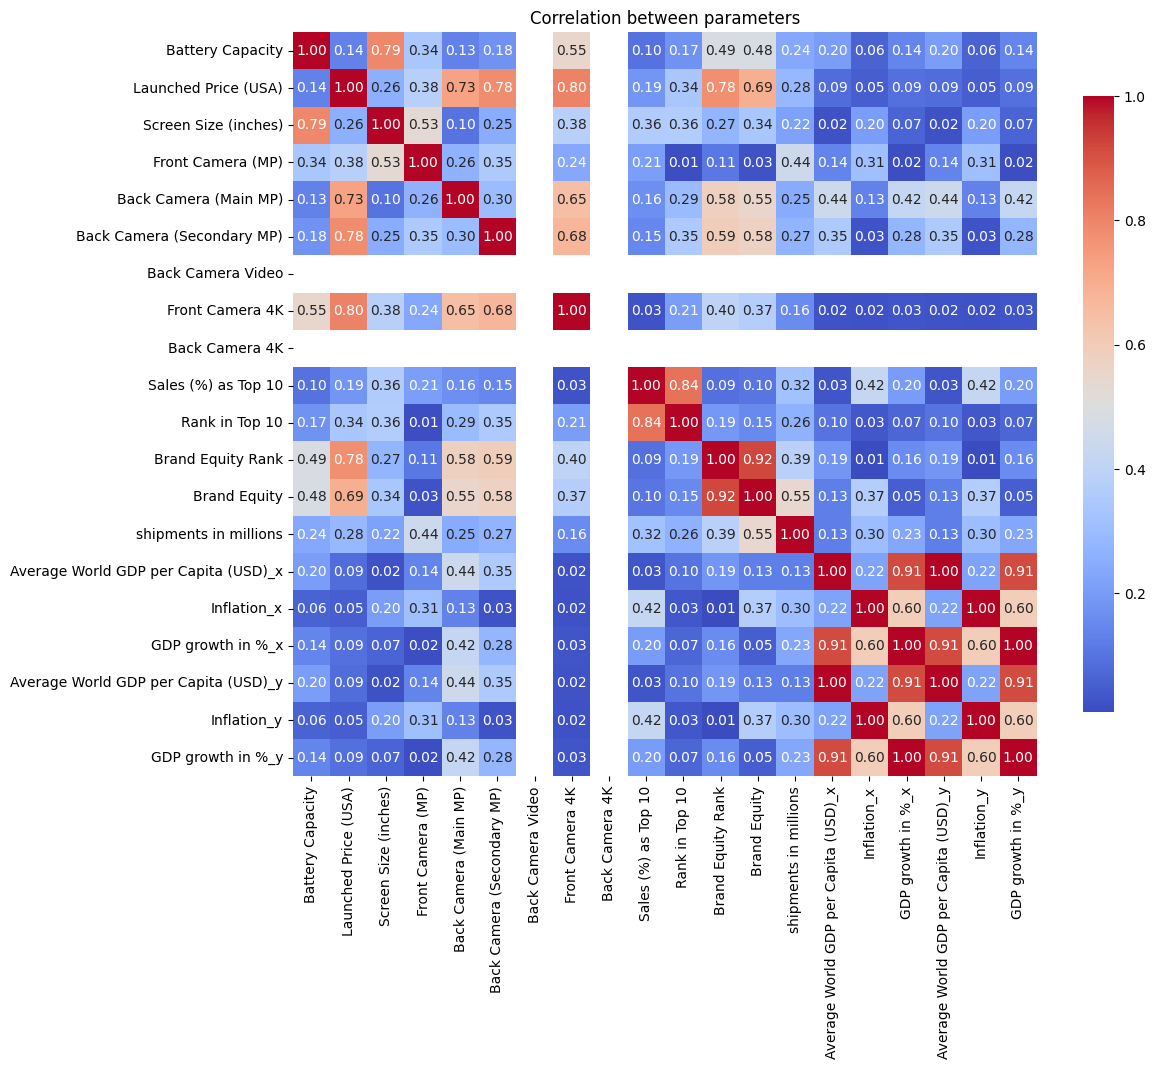

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Function to get numeric columns
def get_numeric_columns(df):
    """
    Returns a list of column names in the DataFrame that have numeric data types.
    """
    return df.select_dtypes(include='number').columns.tolist()

# Example: Clean 'Battery Capacity' column
# Remove 'mAh', strip spaces, remove commas, convert to integer

# Create Z (list of numeric columns)
Z = get_numeric_columns(df1)
#dropping some varaibles that are not valuable for us
Z.remove("Year")
# Compute correlation matrix
corr = df1[Z].corr().abs()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation between parameters')
plt.show()

### Directly applying the methodology of BLP 

In [ ]:
df1['Sales (%) as Top 10'].head(100)


0     1.6
1     1.6
2     1.6
3     1.6
4     1.6
5     1.6
6     1.6
7     1.6
8     1.6
9     1.6
10    1.6
11    1.6
12    1.7
13    1.7
14    1.7
15    1.7
16    1.7
17    1.7
18    1.4
19    1.4
20    1.4
21    1.4
22    1.4
23    1.4
24    1.2
25    1.2
26    1.2
27    1.2
28    1.2
29    1.2
30    1.7
31    1.7
32    1.7
33    1.7
34    1.7
35    1.7
36    2.1
37    2.1
38    2.1
39    1.3
40    1.3
41    1.3
42    1.6
43    1.6
44    1.2
45    1.2
46    1.6
47    1.6
48    1.1
49    1.1
Name: Sales (%) as Top 10, dtype: float64

In [ ]:
import re
import numpy as np
import pandas as pd
import pyblp

# ==============================================================
# 0) Copy input
# ==============================================================
df0 = df1.copy()

# ==============================================================
# 1) Rename columns to what BLP expects
# ==============================================================
df0 = df0.rename(columns={
    'Year':                   'year',
    'Company Name':           'product_id',
    'Model Name':             'model_name',
    'Launched Price (USA)':   'prices',
    'Screen Size (inches)':   'screen_size',
    'Front Camera (MP)':      'front_cam_mp',
    'Front Camera 4K':        'front_cam_4k',
    'Back Camera 4K':         'back_cam_4k',
    'Back Camera (Main MP)':  'back_cam_main_mp',
    'Back Camera (Secondary MP)': 'back_cam_sec_mp',
    'Sales (%) as Top 10':    'shares',       # within Top-10 %
    'Front Camera Video':     'front_video_flag',
    'Back Camera Video':      'back_video',
    'Rank in Top 10':         'rank_top10',
    'Brand Equity':           'brand_equity',
    'Brand Equity Rank':      'brand_equity_rank',
    'shipments in millions':  'shipments_in_millions',
    'Average World GDP per Capita (USD)': 'Average_World_GDP_per_Capita_USD',
    'GDP growth in %':        'GDP_growth_in_%',
    'Battery Capacity':       'battery_capacity'
})

# ==============================================================
# 2) Shares: % -> fraction (still within Top-10 group)
# ==============================================================
df0['shares'] = df0['shares'] / 100.0
df0['shares'] = df0['shares'].clip(1e-8, 1 - 1e-8)

# ==============================================================
# 3) IDs (normalize to clean strings)
# ==============================================================
df0['market_ids']  = df0['year'].astype(str).str.strip()
df0['product_ids'] = (df0['product_id'].astype(str).str.strip()
                      + " " +
                      df0['model_name'].astype(str).str.strip())

# ==============================================================
# 4) Aggregate duplicates (one row per market/product)
# ==============================================================
specs = ['prices','shares'] + [
    c for c in [
        'screen_size','front_cam_mp','back_cam_main_mp','back_cam_sec_mp',
        'brand_equity_rank','battery_capacity'
    ] if c in df0.columns
]

macro_cols = [
    'market_ids',
    'Average_World_GDP_per_Capita_USD',
    'Inflation',
    'GDP_growth_in_%',
    'shipments_in_millions',
    'rank_top10'
]
available_macro = [c for c in macro_cols if c in df0.columns]
macro = df0[available_macro].drop_duplicates('market_ids')

df_panel = (
    df0.groupby(['market_ids','product_ids'], as_index=False)[specs]
       .agg(lambda x: x.iloc[0] if x.name == 'shares' else x.mean())
)
df_panel = df_panel.merge(macro, on='market_ids', how='left')

# ==============================================================
# 5) Rescale Top-10 shares to market shares
#    coverage(year) = SUM of Top-10 shares in that year  (your requested rule)
#    => blp_share = coverage * within_top10_share
# ==============================================================
market_cov = df_panel.groupby('market_ids')['shares'].sum().rename('coverage')
df_panel = df_panel.merge(market_cov, on='market_ids', how='left')
df_panel['blp_share'] = (df_panel['shares'] * df_panel['coverage']).clip(1e-12, 1 - 1e-6)

# Diagnostics
diag = df_panel.groupby('market_ids')['blp_share'].sum().to_frame('inside_share')
diag['outside_share'] = 1 - diag['inside_share']
print("\n=== Market share diagnostics (after rescaling) ===")
print(diag)

# ==============================================================
# 6) Build combined_data for pyblp
# ==============================================================
X1 = [c for c in [
    'screen_size','front_cam_mp','back_cam_main_mp','back_cam_sec_mp',
    'battery_capacity','brand_equity_rank','prices'
] if c in df_panel.columns]

combined_data = (
    df_panel[['prices','blp_share'] + X1]
    .rename(columns={'blp_share':'shares'})
    .to_dict(orient='list')
)
combined_data['market_ids']  = df_panel['market_ids'].astype(str).str.strip().tolist()
combined_data['product_ids'] = df_panel['product_ids'].astype(str).str.strip().tolist()

if 'Average_World_GDP_per_Capita_USD' in df_panel.columns:
    combined_data['demand_instruments0'] = df_panel['Average_World_GDP_per_Capita_USD'].tolist()
if 'Inflation' in df_panel.columns:
    combined_data['demand_instruments1'] = df_panel['Inflation'].tolist()
if 'GDP_growth_in_%' in df_panel.columns:
    combined_data['demand_instruments2'] = df_panel['GDP_growth_in_%'].tolist()

# ==============================================================
# 7) Estimate BLP
# ==============================================================
u_formula_str = '0 + ' + ' + '.join(X1) if X1 else '0'
u_form = pyblp.Formulation(u_formula_str)

problem = pyblp.Problem(u_form, combined_data)
results = problem.solve()
print("\n=== Estimation Results ===")
print(results)

# ==============================================================
# 8) Pricing Power Table (assign elasticities by product order)
#    - Convert problem.products to a safe DataFrame of scalar fields
#    - Flatten own-price elasticities across markets by position
# ==============================================================
prods = problem.products  # numpy structured array (may contain non-1D fields)

# Build rows safely (extract only scalar 1-D fields)
rows = []
for i in range(prods.shape[0]):
    rows.append({
        'market_ids':  str(prods['market_ids'][i]).strip(),
        'product_ids': str(prods['product_ids'][i]).strip(),
        'prices':      float(np.ravel(prods['prices'][i])[0]),
        'shares':      float(np.ravel(prods['shares'][i])[0]),
    })
prod_df = pd.DataFrame(rows)

# Compute own-price elasticities flattened in the order pyblp uses
elasticities = results.compute_elasticities()
if isinstance(elasticities, list):
    # concatenate diagonals in pyblp's per-market order
    own_all = np.concatenate([np.diag(E) for E in elasticities]) if len(elasticities) else np.array([])
else:
    # single market
    own_all = np.diag(elasticities)

# Assign by position (order of products matches pyblp's internals)
if len(own_all) != len(prod_df):
    # Graceful fallback with a clear message; truncate to the matching length
    n = min(len(own_all), len(prod_df))
    print(f"\n[WARN] Elasticity count ({len(own_all)}) != product rows ({len(prod_df)}). "
          f"Assigning first {n} in order. Inspect data/coverage if this persists.")
    prod_df = prod_df.iloc[:n].copy()
    own_all = own_all[:n]

prod_df['own_elasticity'] = own_all

# Pricing power metrics
prod_df['lerner_index']   = -1.0 / prod_df['own_elasticity']          # (P - MC)/P
prod_df['markup_dollars'] = prod_df['lerner_index'] * prod_df['prices']
prod_df['marginal_cost']  = prod_df['prices'] - prod_df['markup_dollars']

pricing_table = (
    prod_df[['market_ids','product_ids','prices','shares','own_elasticity',
             'lerner_index','markup_dollars','marginal_cost']]
      .rename(columns={'market_ids':'market_id',
                       'product_ids':'product_id',
                       'prices':'price'})
      .round({'price': 2, 'shares': 4, 'own_elasticity': 3,
              'lerner_index': 3, 'markup_dollars': 2, 'marginal_cost': 2})
)

print("\n=== Pricing Power Table ===")
print(pricing_table)



=== Market share diagnostics (after rescaling) ===
            inside_share  outside_share
market_ids                             
2021            0.001156       0.998844
2022            0.004900       0.995100
2023            0.005929       0.994071
Initializing the problem ...
Initialized the problem after 00:00:00.

Dimensions:
 T    N    K1    MD 
---  ---  ----  ----
 3   12    7     6  

Formulations:
     Column Indices:             0            1               2                 3                4                  5            6   
--------------------------  -----------  ------------  ----------------  ---------------  ----------------  -----------------  ------
X1: Linear Characteristics  screen_size  front_cam_mp  back_cam_main_mp  back_cam_sec_mp  battery_capacity  brand_equity_rank  prices
Solving the problem ...
Updating the weighting matrix ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Ste

C:\Users\shpctac0ffef\AppData\Local\Temp\ipykernel_21120\1947305347.py:104: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  .to_dict(orient='list')
The model may be under-identified. The total number of unfixed parameters is 7, which is more than the total number of moments, 6. Consider checking whether instruments were properly specified when initializing the problem, and whether parameters were properly configured when solving the problem.


### Retrieving demand based on the coefficients


In [ ]:
# 1) Solve the problem (you already have this)
results = problem.solve()

# 2) Extract the estimated β’s into a dict keyed by your X1 names
#    Make sure X1 is the same list you passed into Formulation
#    e.g. X1 = ['screen_size', ..., 'brand_equity_rank', 'prices']
betas = dict(zip(X1, results.beta))

# 3) Compute predicted shares and add to df_panel
df_panel['pred_share'] = results.compute_shares()

# 4) Compute own‐price elasticity for every product‐market
beta_price = betas['prices']
df_panel['own_elasticity'] = -beta_price * df_panel['prices'] * (1 - df_panel['pred_share'])

# 5) Filter for your target phone & market
#    Replace these strings with the exact product_ids and market_ids you want
mask = (
    (df_panel['product_ids'] == 'Samsung Galaxy S21') &
    (df_panel['market_ids'] == '2021')
)

print(df_panel.loc[mask, ['product_ids', 'market_ids', 'own_elasticity']])


Solving the problem ...
Updating the weighting matrix ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 1    +1.879312E-20     0      +1.710287E+09      +1.142480E+17  

Estimating standard errors ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 2    +2.907355E-19     0      +1.223009E+09      +7.629469E+16  

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
  screen_size     front_cam_mp    back_cam_main_mp  back_cam_sec_mp  battery_capacity  brand_eq

The model may be under-identified. The total number of unfixed parameters is 7, which is more than the total number of moments, 6. Consider checking whether instruments were properly specified when initializing the problem, and whether parameters were properly configured when solving the problem.


In [ ]:
# 1. Peek at a sample of product_ids and market_ids
print(df_panel[['product_ids','market_ids']].head(20))

# 2. See all unique market_ids
print("Markets:", df_panel['market_ids'].unique())

# 3. See the first 20 product_ids
print("Products (first 20):", df_panel['product_ids'].unique()[:20])


                product_ids market_ids
0           Apple iPhone 13       2021
1   Apple iPhone 13 Pro Max       2021
2           Apple iPhone 14       2022
3       Apple iPhone 14 Pro       2022
4   Apple iPhone 14 Pro Max       2022
5      Apple iPhone SE 2022       2022
6        Samsung Galaxy A13       2022
7           Apple iPhone 15       2023
8       Apple iPhone 15 Pro       2023
9   Apple iPhone 15 Pro Max       2023
10    Samsung Galaxy A14 4G       2023
11    Samsung Galaxy A14 5G       2023
Markets: ['2021' '2022' '2023']
Products (first 20): ['Apple iPhone 13' 'Apple iPhone 13 Pro Max' 'Apple iPhone 14'
 'Apple iPhone 14 Pro' 'Apple iPhone 14 Pro Max' 'Apple iPhone SE 2022'
 'Samsung Galaxy A13' 'Apple iPhone 15' 'Apple iPhone 15 Pro'
 'Apple iPhone 15 Pro Max' 'Samsung Galaxy A14 4G' 'Samsung Galaxy A14 5G']


In [ ]:
df_panel

,market_ids,product_ids,prices,shares,screen_size,front_cam_mp,back_cam_main_mp,back_cam_sec_mp,brand_equity_rank,battery_capacity,shipments_in_millions,rank_top10,coverage,blp_share,pred_share,own_elasticity
0,2021,Apple iPhone 13,899.000000,0.021,6.1,12.0,12.0,12.0,1,3240.0,234.9,3.0,0.034,0.000714,0.000714,-0.762301
1,2021,Apple iPhone 13 Pro Max,1232.333333,0.013,6.7,12.0,12.0,12.0,1,4352.0,234.9,3.0,0.034,0.000442,0.000442,-1.045234
2,2022,Apple iPhone 14,865.666667,0.014,6.1,12.0,12.0,12.0,1,3200.0,225.3,7.0,0.070,0.000980,0.000980,-0.733841
3,2022,Apple iPhone 14 Pro,1199.000000,0.012,6.1,12.0,48.0,12.0,1,4200.0,225.3,7.0,0.070,0.000840,0.000840,-1.016556
4,2022,Apple iPhone 14 Pro Max,1299.000000,0.017,6.7,12.0,48.0,12.0,1,4500.0,225.3,7.0,0.070,0.001190,0.001190,-1.100954
5,2022,Apple iPhone SE 2022,429.000000,0.011,4.7,7.0,12.0,0.0,1,2018.0,225.3,7.0,0.070,0.000770,0.000770,-0.363747
6,2022,Samsung Galaxy A13,189.990000,0.016,6.6,8.0,2.0,0.0,2,5000.0,225.3,7.0,0.070,0.001120,0.001120,-0.161035
7,2023,Apple iPhone 15,865.666667,0.016,6.1,12.0,48.0,0.0,1,3200.0,231.5,7.0,0.077,0.001232,0.001232,-0.733656
8,2023,Apple iPhone 15 Pro,1199.000000,0.016,6.1,12.0,48.0,12.0,1,4400.0,231.5,7.0,0.077,0.001232,0.001232,-1.016157
9,2023,Apple iPhone 15 Pro Max,1299.000000,0.017,6.7,12.0,48.0,12.0,1,4500.0,231.5,7.0,0.077,0.001309,0.001309,-1.100823


In [ ]:
mask = (
    df_panel['product_ids'].str.contains("Apple iPhone 13", case=False, regex=False)
) & (
    df_panel['market_ids'] == "2021"
)
print(df_panel.loc[mask, ['product_ids','market_ids','own_elasticity']])


               product_ids market_ids  own_elasticity
0          Apple iPhone 13       2021        -1.06387
1  Apple iPhone 13 Pro Max       2021        -1.47025


### Pricing power

In [ ]:
# Pricing power (Lerner index) = markup fraction = (P - MC) / P
df_panel['lerner_index'] = -1.0 / df_panel['own_elasticity']

# If you prefer markup in dollar terms and you have price:
#   (P - MC) = lerner_index * P
df_panel['markup_dollars'] = df_panel['lerner_index'] * df_panel['prices']

# For example, “Samsung Galaxy S21 Ultra” in market “2021”
mask = (
    df_panel['product_ids'].str.contains("Apple iPhone 13", case=False, regex=False)
) & (
    df_panel['market_ids'] == "2021"
)

print(df_panel.loc[mask, 
                   ['product_ids','market_ids','own_elasticity',
                    'lerner_index','markup_dollars']])

avg_price_iphone_13 = df0.loc[df0['model_name'] == "iPhone 13" , 'prices']

diff = avg_price_iphone_13 - 600  
print(f'{diff}' )

               product_ids market_ids  own_elasticity  lerner_index  \
0          Apple iPhone 13       2021       -0.762301      1.311817   
1  Apple iPhone 13 Pro Max       2021       -1.045234      0.956724   

   markup_dollars  
0     1179.323788  
1     1179.002870  
36    199.0
37    299.0
38    399.0
Name: prices, dtype: float64


In [ ]:
# 1. Filter to iPhone 13 rows
mask = df_panel['product_ids'].str.contains("iPhone 13", case=False, regex=False)
iphone13 = df_panel.loc[mask, ['product_ids', 'prices', 'markup_dollars']].copy()

# 2. Compute diff = price – markup_dollars
iphone13['diff'] = iphone13['prices'] - iphone13['markup_dollars']

# 3. Print each row and the overall average
print(iphone13[['product_ids', 'markup_dollars', 'diff']])

avg_diff = iphone13['diff'].mean()
print(f"\nAverage price minus markup for iPhone 13 variants: {avg_diff:.2f}")


               product_ids  markup_dollars        diff
0          Apple iPhone 13     1179.323788 -280.323788
1  Apple iPhone 13 Pro Max     1179.002870   53.330463

Average price minus markup for iPhone 13 variants: -113.50


In [ ]:
df_panel
blp_df = df_panel.copy()
blp_df.to_csv('blp_df.csv', index=False)
blp_df.columns.to_list()

['market_ids',
 'product_ids',
 'prices',
 'shares',
 'screen_size',
 'front_cam_mp',
 'back_cam_main_mp',
 'back_cam_sec_mp',
 'brand_equity_rank',
 'battery_capacity',
 'shipments_in_millions',
 'rank_top10',
 'coverage',
 'blp_share',
 'pred_share',
 'own_elasticity',
 'lerner_index',
 'markup_dollars']

In [ ]:
# ========= Extraction & Viewing Helpers =========
import re
import pandas as pd

# 0) Ensure we have the final table from your previous cell
#    (pricing_table columns: market_id, product_id, price, shares, own_elasticity, lerner_index, markup_dollars, marginal_cost)

# 1) Add brand (first token before space) for easy grouping; tweak if your "brand" needs special parsing
def _infer_brand(pid: str) -> str:
    return str(pid).split()[0] if isinstance(pid, str) else ""

pt = pricing_table.copy()
pt["brand"] = pt["product_id"].apply(_infer_brand)

# 2) Convenience extractors
def extract_by_model(model_substring: str, markets=None, case=False):
    """Return rows whose product_id contains model_substring; optionally filter to markets (list or str)."""
    mask = pt["product_id"].str.contains(model_substring, case=case, regex=False, na=False)
    out = pt.loc[mask]
    if markets is not None:
        if isinstance(markets, (list, tuple, set)):
            out = out[out["market_id"].astype(str).isin([str(m) for m in markets])]
        else:
            out = out[out["market_id"].astype(str) == str(markets)]
    # nice ordering
    return (out
            .sort_values(["market_id","product_id"])
            .reset_index(drop=True))

def extract_by_brand(brand: str, markets=None, case=False):
    """Return rows for a brand (exact match on inferred brand)."""
    mask = pt["brand"].str.contains(f"^{re.escape(brand)}$", case=case, regex=True, na=False)
    out = pt.loc[mask]
    if markets is not None:
        if isinstance(markets, (list, tuple, set)):
            out = out[out["market_id"].astype(str).isin([str(m) for m in markets])]
        else:
            out = out[out["market_id"].astype(str) == str(markets)]
    return (out
            .sort_values(["market_id","product_id"])
            .reset_index(drop=True))

def extract_by_market(market_id: str):
    """All phones in a given market (e.g., '2021')."""
    return (pt[pt["market_id"].astype(str) == str(market_id)]
            .sort_values(["price"], ascending=False)
            .reset_index(drop=True))

# 3) Useful rankings / summaries
def top_markups(n=10):
    return (pt.sort_values(["markup_dollars"], ascending=False)
             .head(n)
             .reset_index(drop=True))

def most_elastic(n=10):
    # more negative = larger absolute elasticity
    return (pt.sort_values(["own_elasticity"], ascending=True)
             .head(n)
             .reset_index(drop=True))

def brand_summary():
    agg = (pt.groupby("brand", as_index=False)
             .agg(avg_price=("price","mean"),
                  avg_markup_usd=("markup_dollars","mean"),
                  avg_own_elast=("own_elasticity","mean"),
                  models=("product_id","nunique")))
    return agg.sort_values("avg_markup_usd", ascending=False).round(3)

# 4) Pretty print examples (feel free to comment these out)
print("\n--- All phones (first 15 rows) ---")
print(pt.head(15))

print("\n--- Top 10 markups ---")
print(top_markups(10))

print("\n--- Most elastic (top 10, most negative own-price) ---")
print(most_elastic(10))

print("\n--- Brand summary ---")
print(brand_summary())

# 5) Example: extract a specific phone/market
#    (EDIT the model keyword and market as you like)
example = extract_by_model("iPhone 13", markets="2021", case=False)
print("\n--- Example: iPhone 13 in 2021 ---")
print(example)

# 6) Export for sharing
csv_path   = "pricing_power_table.csv"
excel_path = "pricing_power_table.xlsx"

pt.to_csv(csv_path, index=False)

print(f"\nSaved CSV to: {csv_path}")
print(f"Saved Excel to: {excel_path}")
print(pt.to_string(index=False, max_rows=None))


from pathlib import Path
Path("0_Data").mkdir(parents=True, exist_ok=True)

try:
    with pd.ExcelWriter("pricing_power_table_formatted.xlsx", engine="xlsxwriter") as writer:
        pt.to_excel(writer, sheet_name="pricing_power", index=False)
        wb  = writer.book
        ws  = writer.sheets["pricing_power"]
        money = wb.add_format({'num_format': '#,##0.00'})
        three = wb.add_format({'num_format': '0.000'})
        ws.set_column(0, 0, 10)           # market_id
        ws.set_column(1, 1, 28)           # product_id
        ws.set_column(2, 2, 10, money)    # price
        ws.set_column(3, 3, 10, three)    # shares
        ws.set_column(4, 5, 14, three)    # own_elasticity, lerner_index
        ws.set_column(6, 7, 14, money)    # markup_dollars, marginal_cost
        ws.freeze_panes(1, 0)
except ModuleNotFoundError:
    # Fallback: write a plain Excel with openpyxl
    print("xlsxwriter not found — writing a plain Excel via openpyxl.")
    pt.to_excel("pricing_power_table_formatted.xlsx", index=False, engine="openpyxl")




--- All phones (first 15 rows) ---
  market_id                   product_id    price  shares  own_elasticity  \
0  ['2021']          ['Apple iPhone 13']   899.00  0.0007           0.762   
1  ['2021']  ['Apple iPhone 13 Pro Max']  1232.33  0.0004           1.045   
2  ['2022']          ['Apple iPhone 14']   865.67  0.0010          -0.001   
3  ['2022']      ['Apple iPhone 14 Pro']  1199.00  0.0008          -0.000   
4  ['2022']  ['Apple iPhone 14 Pro Max']  1299.00  0.0012          -0.000   

   lerner_index  markup_dollars  marginal_cost    brand  
0        -1.312        -1179.32        2078.32  ['Apple  
1        -0.957        -1179.00        2411.34  ['Apple  
2       762.372       659959.74     -659094.08  ['Apple  
3      3567.589      4277539.49    -4276340.49  ['Apple  
4      5538.270      7194212.27    -7192913.27  ['Apple  

--- Top 10 markups ---
  market_id                   product_id    price  shares  own_elasticity  \
0  ['2022']  ['Apple iPhone 14 Pro Max']  1299.00  0

In [ ]:
# ===== One-shot: turn pricing_table into a DataFrame, show & save it =====
import pandas as pd
from pathlib import Path

# 0) Build DataFrame (pt) from your final pricing_table
pt = pd.DataFrame(pricing_table).copy()

# 1) Display full table in notebook (no truncation)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)
pd.set_option('display.max_colwidth', None)

# Show in output and also print as a full string if you prefer
display(pt)                      # Jupyter-friendly
print(pt.to_string(index=False)) # Console-friendly (can be long!)

# 2) Ensure output folder exists
out_dir = Path("0_Data")
out_dir.mkdir(parents=True, exist_ok=True)

# 3) Save to common formats
pt.to_csv(out_dir / "pricing_power_table.csv", index=False)
pt.to_html(out_dir / "pricing_power_table.html", index=False)

# 4) Excel export: try xlsxwriter (formatted), fallback to openpyxl (plain)
excel_path = out_dir / "pricing_power_table.xlsx"
try:
    with pd.ExcelWriter(excel_path, engine="xlsxwriter") as writer:
        pt.to_excel(writer, sheet_name="pricing_power", index=False)
        wb, ws = writer.book, writer.sheets["pricing_power"]
        money = wb.add_format({'num_format': '#,##0.00'})
        three = wb.add_format({'num_format': '0.000'})
        # Optional column formatting (adjust if your columns differ)
        # market_id, product_id, price, shares, own_elasticity, lerner_index, markup_dollars, marginal_cost, brand?
        ws.set_column(0, 0, 10)         # market_id
        ws.set_column(1, 1, 28)         # product_id
        ws.set_column(2, 2, 12, money)  # price
        ws.set_column(3, 3, 10, three)  # shares
        ws.set_column(4, 5, 14, three)  # own_elasticity, lerner_index
        ws.set_column(6, 7, 14, money)  # markup_dollars, marginal_cost
        ws.freeze_panes(1, 0)
except ModuleNotFoundError:
    # Fallback: plain Excel (no formatting)
    pt.to_excel(excel_path, index=False, engine="openpyxl")

# 5) Fast reload formats (optional)
pt.to_pickle(out_dir / "pricing_power_table.pkl")
try:
    pt.to_parquet(out_dir / "pricing_power_table.parquet")  # requires pyarrow or fastparquet
except Exception as e:
    print(f"[WARN] Parquet save skipped: {e}")

print(f"\nSaved files in: {out_dir.resolve()}")


,market_id,product_id,price,shares,own_elasticity,lerner_index,markup_dollars,marginal_cost
0,['2021'],['Apple iPhone 13'],899.00,0.0007,0.762,-1.312,-1179.32,2078.32
1,['2021'],['Apple iPhone 13 Pro Max'],1232.33,0.0004,1.045,-0.957,-1179.00,2411.34
2,['2022'],['Apple iPhone 14'],865.67,0.0010,-0.001,762.372,659959.74,-659094.08
3,['2022'],['Apple iPhone 14 Pro'],1199.00,0.0008,-0.000,3567.589,4277539.49,-4276340.49
4,['2022'],['Apple iPhone 14 Pro Max'],1299.00,0.0012,-0.000,5538.270,7194212.27,-7192913.27


market_id                  product_id   price  shares  own_elasticity  lerner_index  markup_dollars  marginal_cost
 ['2021']         ['Apple iPhone 13']  899.00  0.0007           0.762        -1.312        -1179.32        2078.32
 ['2021'] ['Apple iPhone 13 Pro Max'] 1232.33  0.0004           1.045        -0.957        -1179.00        2411.34
 ['2022']         ['Apple iPhone 14']  865.67  0.0010          -0.001       762.372       659959.74     -659094.08
 ['2022']     ['Apple iPhone 14 Pro'] 1199.00  0.0008          -0.000      3567.589      4277539.49    -4276340.49
 ['2022'] ['Apple iPhone 14 Pro Max'] 1299.00  0.0012          -0.000      5538.270      7194212.27    -7192913.27
[WARN] Parquet save skipped: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet suppo